In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
435,-0.566939,0.655609,0.237554
332,-0.374035,4.116751,-0.465058
316,-1.137614,0.263502,-1.553206
536,0.574411,-0.573732,0.481967
260,2.110181,0.296794,1.399566
...,...,...,...
107,0.211567,0.506411,2.691892
265,0.668567,-0.700735,-0.312525
191,0.542834,-0.637850,-0.077120
502,-0.545122,-1.648942,-1.200699


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
126,-0.301122,1.085940,-0.736494
529,-2.107876,0.666706,-0.934066
28,0.526185,0.169791,-0.182211
187,0.102485,0.205550,1.280062
212,1.300672,1.704926,2.046930
...,...,...,...
134,-0.550864,-0.742658,-1.938741
541,0.581300,0.425031,-0.004457
444,-0.922893,-0.990499,-2.064851
355,-0.220745,0.868925,-0.283099


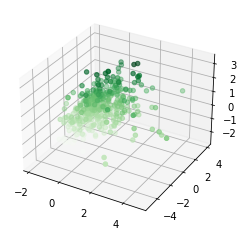

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
435,0.655609,-0.566939
332,4.116751,-0.374035
316,0.263502,-1.137614
536,-0.573732,0.574411
260,0.296794,2.110181
...,...,...
107,0.506411,0.211567
265,-0.700735,0.668567
191,-0.637850,0.542834
502,-1.648942,-0.545122


In [10]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
435,0.237554
332,-0.465058
316,-1.553206
536,0.481967
260,1.399566
...,...
107,2.691892
265,-0.312525
191,-0.077120
502,-1.200699


In [11]:
sc=StandardScaler()
X_transform=sc.fit_transform(dataF)
lin_reg = LinearRegression()
lin_reg.fit(X_transform, targetF)
lin_reg.intercept_, lin_reg.coef_

(array([0.03061612]), array([[0.24733856, 0.44891418]]))

In [12]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.6556089879341426


In [13]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
126,1.085940,-0.301122
529,0.666706,-2.107876
28,0.169791,0.526185
187,0.205550,0.102485
212,1.704926,1.300672
...,...,...
134,-0.742658,-0.550864
541,0.425031,0.581300
444,-0.990499,-0.922893
355,0.868925,-0.220745


In [14]:
testY

,quantitative response of LC50
126,-0.736494
529,-0.934066
28,-0.182211
187,1.280062
212,2.046930
...,...
134,-1.938741
541,-0.004457
444,-2.064851
355,-0.283099


In [15]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
1.0859398253756372


In [16]:
iters = 10000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

w0 = 0.030614737054892247


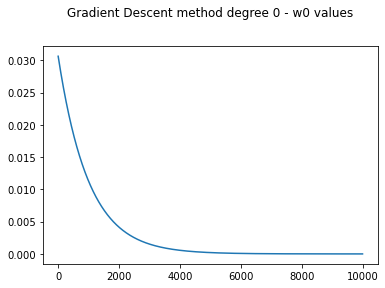

In [17]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.mean(valY)-w)
    #print(w1,w)
    if w1-w <= 10**(-20):
        w=w1
        break
    counter+=1
    costArr[counter] = (np.mean(valY)-w)
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.title("Gradient Descent method degree 0 - w0 values", y = 1, pad = 30)
plt.show() 

In [18]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.49537782329201396

In [19]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.5161012873162786

w0=0.018087314092284267
w1=0.24496408780813403
w2=0.4184571414586202


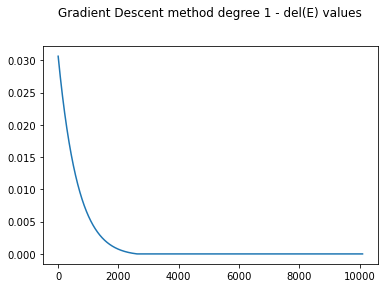

In [20]:
# degree 1
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]


   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 1 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [21]:
# training data error for degree 1
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.3306200679565899

In [22]:
# testing data error for degree 1
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.33179614122413

In [23]:
learningRate = 0.01

w0=0.10262013946915081
w1=0.33794160161689213
w2=0.42143733151473783
w3=-0.09540458735986727
w4=-0.03189049602671601
w5=0.027692164317133987


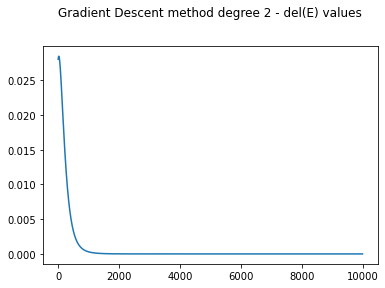

In [24]:
# Degree 2 here
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2

    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[100:-1])
plt.title("Gradient Descent method degree 2 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [25]:
# training data error for degree 2
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.3144601297739153

In [26]:
# testing data error for degree 2
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.3322137407469069

w0=0.09357802787366104
w1=0.34549721234835645
w2=0.4366031810783665
w3=-0.13623803840197724
w4=0.0031084494753965022
w5=0.06027052701238652
w6=0.010792437407249077
w7=-0.01960960418290729
w8=-0.013948237890357719
w9=0.0024105988121533384


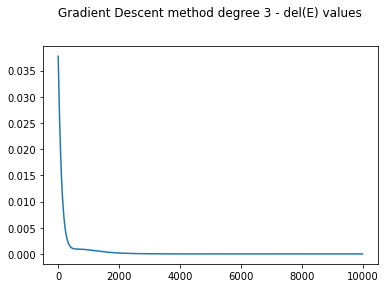

In [27]:
# Degree 3 here
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
#     if w1[0] - w[0] <= 10**(-20):
#         w=w1
#         break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[100:-1])
plt.title("Gradient Descent method degree 3 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [28]:
# training data error for degree 3
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.3115072570352346

In [29]:
# testing data error for degree 3
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.329146021733345

In [37]:
iters = 4000

In [38]:
# Degree 4 here
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((((valY[j,0]/10**4) - np.sum((w/10**4)*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')



w0=0.00011417166211118692
w1=0.0015642317810700926
w2=0.001975368994715425
w3=-0.00019950268592877022
w4=0.00013885754523354995
w5=0.0004612211985472552
w6=0.0028636074408660223
w7=0.0027708403372345473
w8=0.0023142147473205386
w9=0.005137384270785269
w10=-0.00032413995956185004
w11=0.0011700169410397967
w12=-0.0003612637146204455
w13=0.0016448210510674251
w14=0.00046197849136661974


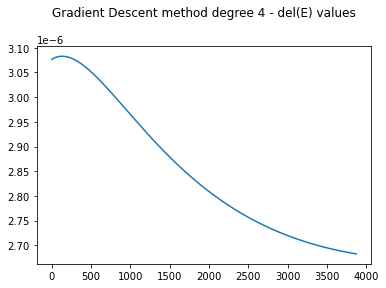

In [39]:
fig,ax = plt.subplots()
ax.plot(costArr[100:-1*int(iters/50)])
plt.title("Gradient Descent method degree 4 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [40]:
# training data error for degree 4
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.4796002928295805

In [41]:
# testing data error for degree 4
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.49935820442250006

In [42]:
# iters = 10000
# leerningRate = 10**-6

w0=1.2091385657366707e-05
w1=0.00015739462825707027
w2=0.0001950609563744361
w3=-2.214970926803896e-05
w4=3.361130857939445e-06
w5=5.3337928597399625e-05
w6=0.00026995254690404555
w7=0.00024250926121820022
w8=0.000239859141021276
w9=0.0004288460990550115
w10=-0.00012066214968059122
w11=3.805973583716376e-06
w12=-4.7155447771456474e-05
w13=-8.834867798051072e-05
w14=0.000248884440847481
w15=7.781327427362942e-05
w16=0.00038097385544766165
w17=0.0002670071331743655
w18=7.385873485407932e-05
w19=0.00048536893126356314
w20=0.0006849006580125983


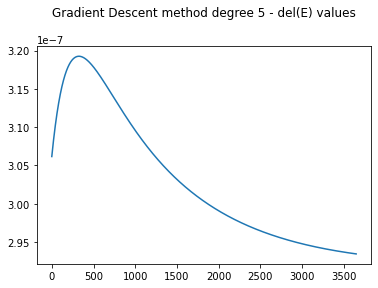

In [44]:
# degree 5
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((((valY[j,0]/10**5) - np.sum((w/10**5)*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*int(iters/10)])
plt.title("Gradient Descent method degree 5 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [45]:
# training data error for degree 5
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

0.4880747665042855

In [46]:
# testing data error for degree 5
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

0.5062257440993811

In [ ]:
# degree 6
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - np.sum(w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*int(iters/10)])
plt.title("Gradient Descent method degree 6 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [ ]:
# training data error for degree 6
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error for degree 6
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

In [ ]:
# degree 7
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - np.sum(w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*int(iters/10)])
plt.title("Gradient Descent method degree 7 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [ ]:
# training data error for degree 7
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

In [ ]:
# testing data error for degree 7
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

In [ ]:
# degree 8
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - np.sum(w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*int(iters/10)])
plt.title("Gradient Descent method degree 8 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [ ]:
# training data error for degree 8
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error for degree 8
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

In [ ]:
# degree 9
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters +50)
counterArr = np.zeros(iters +50)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - np.sum(w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*int(iters/10)])
plt.title("Gradient Descent method degree 9 - del(E) values", y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end, 

In [ ]:
# training data error for degree 9
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error for degree 9
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/(np.shape(testXVal)[0]*2)

In [ ]:
# stochastic gradient descent after this

In [ ]:
k = np.random.randint(low = 0, high = np.shape(valX)[0])
k

In [ ]:
# degree 0
iters = 100000
learningRate = 0.001
degree = 0
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 0 - del(E) values", y = 1, pad = 30)
plt.show()  

In [ ]:
# degree 1
iters = 3000
learningRate = 0.01
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 1 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 2
iters = 3000
learningRate = 0.01
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 2 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 3
iters = 3000
learningRate = 0.01
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 3 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 4
iters = 300000
learningRate = 0.01
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 4 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 5
iters = 300000
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 5 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 6
iters = 300000
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 6 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 7
iters = 300000
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 7 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 8
iters = 300000
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 8 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 9
iters = 300000
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += ((((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0])/10**10
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]*10**10
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-10])
plt.title("Stochastic Gradient Descent method degree 9 - del(E) values", y = 1, pad = 30)
plt.show() 